# Identitas

**Nama: Ryo khrisna fitriawan**

**NIM: A11.2022.13991**

**Topik: Mengurangi Dampak Negatif Berita terhadap Kesehatan Mental Pembaca melalui Filter Berita Buruk Berbasis Machine Learning**

# Latar Belakang

Di era digital, kemudahan akses informasi melalui internet juga membawa dampak buruk terhadap kesehatan mental pembaca, terutama dari berita negatif seperti pembunuhan, kecelakaan, dan bencana alam yang dapat memicu stres, kecemasan, dan depresi. Penelitian menunjukkan bahwa berita negatif memiliki dampak signifikan terhadap kesehatan mental, khususnya jika tersebar luas di media sosial. Solusi yang diusulkan adalah penggunaan filter berita berbasis teknologi machine learning untuk menyaring berita yang merugikan kesehatan mental pembaca. Penelitian sebelumnya menggunakan algoritma Naive Bayes dan Support Vector Machine (SVM) menunjukkan akurasi tinggi dalam memisahkan berita baik dan buruk. Fokus penelitian ini adalah mengimplementasikan teknologi machine learning dalam filter berita, mengidentifikasi tantangan pengembangannya, menilai efektivitasnya dalam mengurangi dampak negatif berita, serta mengembangkan strategi optimal untuk memaksimalkan pemisahan berita demi kesehatan mental pembaca.


# library yang dibutuhkan

In [24]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


# Penjelasan Dataset

Dataset yang Anda berikan memiliki dua kolom utama:

- Emotion: Kolom ini berisi emosi yang terkait dengan teks. Emosi dapat berupa salah satu dari beberapa kategori seperti 'joy', 'sadness', 'anger', 'surprise', 'disgust', 'fear', atau 'neutral'.
- Text: Kolom ini berisi teks atau kalimat yang dihubungkan dengan emosi di kolom "Emotion".

Exploratory Data Analysis (EDA)
EDA bertujuan untuk memahami distribusi data, mengidentifikasi pola, dan menemukan hubungan yang menarik dalam data. Berikut adalah beberapa langkah EDA yang dapat kita lakukan pada dataset ini:

- Distribusi Emosi: Melihat distribusi dari berbagai emosi yang ada dalam dataset.
- Panjang Teks: Memeriksa distribusi panjang teks untuk mengetahui variasi panjang teks dalam dataset.
- Frekuensi Kata: Mengetahui kata-kata yang paling sering muncul dalam dataset.

Mari kita lakukan EDA ini.

In [25]:
# Memuat dataset
file_path = 'emotion_dataset_raw.csv'
emotion_data = pd.read_csv(file_path)

# Membersihkan teks
def clean_text(text):
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip().lower()
    return text

emotion_data['Clean_Text'] = emotion_data['Text'].apply(clean_text)

# Mengubah emosi menjadi label biner
positive_emotions = ['joy', 'surprise']
negative_emotions = ['anger', 'disgust', 'fear', 'sadness']

emotion_data['Label'] = emotion_data['Emotion'].apply(lambda x: 1 if x in positive_emotions else 0)


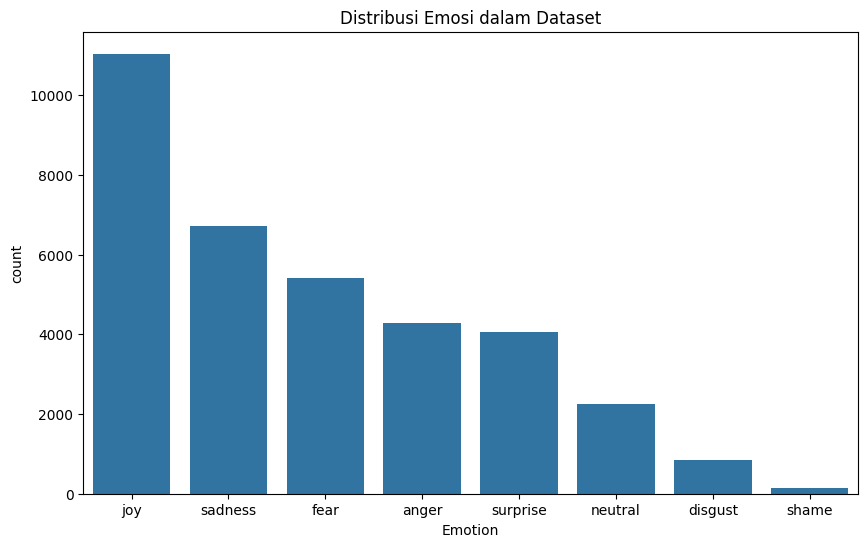

In [26]:
# distribusi emosi
plt.figure(figsize=(10,6))
sns.countplot(data=emotion_data, x='Emotion', order=emotion_data['Emotion'].value_counts().index)
plt.title('Distribusi Emosi dalam Dataset')
plt.show()


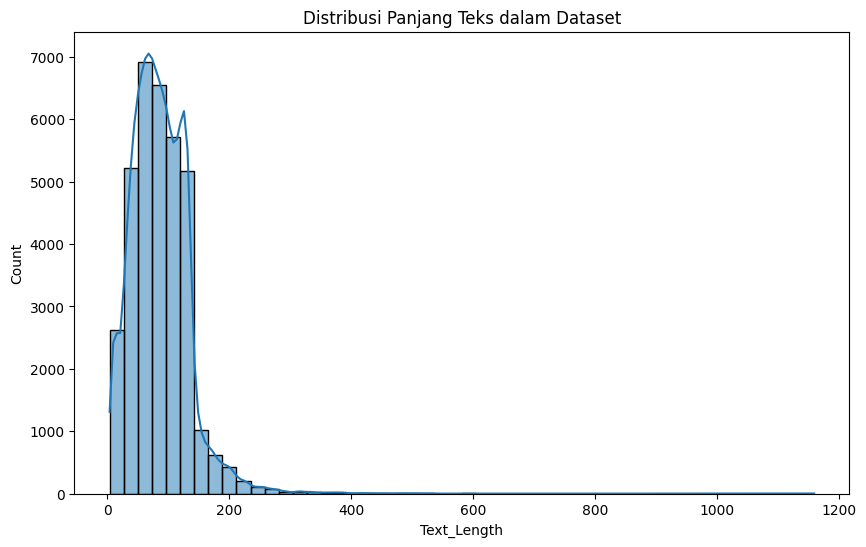

In [27]:
# panjang teks

emotion_data['Text_Length'] = emotion_data['Text'].apply(len)

plt.figure(figsize=(10,6))
sns.histplot(data=emotion_data, x='Text_Length', bins=50, kde=True)
plt.title('Distribusi Panjang Teks dalam Dataset')
plt.show()


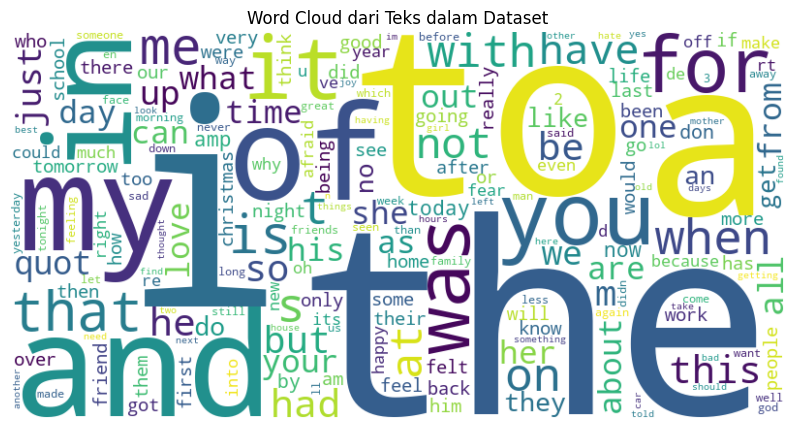

In [28]:
# frekuensi kata

from collections import Counter
from wordcloud import WordCloud

all_text = ' '.join(emotion_data['Clean_Text'])
word_counts = Counter(all_text.split())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Teks dalam Dataset')
plt.show()


# Proses Learning / Modeling

Untuk membuat kode yang mengklasifikasi suatu paragraf sebagai berita baik atau buruk berdasarkan emosi dari tiap kata dalam paragraf, kita akan mengubah teks menjadi fitur numerik menggunakan TF-IDF, dan melatih model Logistic Regression.

Logistic Regression sendiri adalah model pembelajaran mesin yang digunakan untuk klasifikasi biner, yang berarti model ini memprediksi satu dari dua kemungkinan hasil.

Alasan Menggunakan Logistic Regression
- Sederhana dan Efisien: Logistic Regression adalah model yang sederhana dan efisien untuk klasifikasi biner. Model ini sering kali memberikan hasil yang cukup baik untuk masalah klasifikasi dasar.
- Probabilistik: Logistic Regression memberikan probabilitas untuk kelas yang diprediksi, yang dapat membantu dalam interpretasi hasil.
- Mudah Diimplementasikan: Pustaka scikit-learn menyediakan implementasi yang mudah digunakan dari Logistic Regression.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(emotion_data['Clean_Text'], emotion_data['Label'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

# Performa Model

Uji performa model bertujuan untuk mengukur akurasi prediksi pada data yang belum pernah dilihat sebelumnya, mengidentifikasi kekuatan dan kelemahan model, memastikan kemampuan generalisasi dari data pelatihan ke data baru, membandingkan performa berbagai model, dan mengoptimalkan model berdasarkan hasil evaluasi. Dengan menggunakan metrik seperti akurasi, presisi, recall, dan F1-score, uji performa memberikan gambaran lengkap tentang efektivitas model dan area yang memerlukan perbaikan lebih lanjut.

- Precision: Untuk kelas 0 (berita buruk) dan kelas 1 (berita baik), precision adalah 0.79. Ini berarti bahwa 79% dari prediksi sebagai berita baik atau buruk adalah benar.
- Recall: Recall untuk kelas 0 adalah 0.86 dan untuk kelas 1 adalah 0.70. Ini menunjukkan bahwa model lebih baik dalam mendeteksi berita - buruk dibandingkan dengan berita baik.
- F1-score: F1-score adalah metrik harmonisasi dari precision dan recall. F1-score untuk kelas 0 adalah 0.82 dan untuk kelas 1 adalah 0.74.
- Accuracy: Akurasi keseluruhan dari model adalah 0.79, menunjukkan bahwa model ini benar dalam 79% dari total prediksi.

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      3973
           1       0.79      0.70      0.74      2986

    accuracy                           0.79      6959
   macro avg       0.79      0.78      0.78      6959
weighted avg       0.79      0.79      0.79      6959

Akurasi: 0.79
Presisi: 0.79
Recall: 0.70
F1-score: 0.74


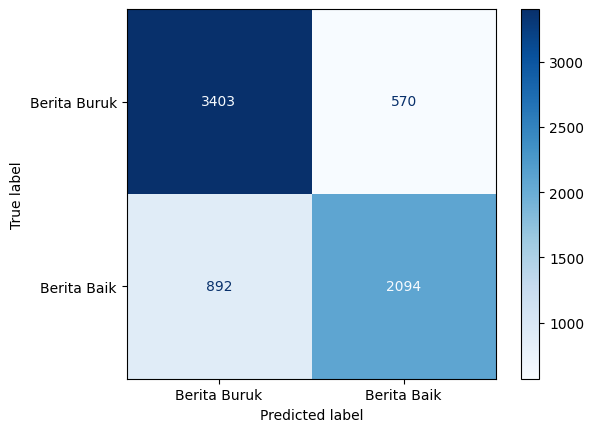

In [30]:
y_pred = model.predict(X_test_tfidf)

report = classification_report(y_test, y_pred)
print(report)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Akurasi: {accuracy:.2f}')
print(f'Presisi: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Berita Buruk', 'Berita Baik'])
disp.plot(cmap='Blues')
plt.show()


**Menggunakan Model untuk Prediksi**

Untuk menggunakan model ini dalam mengklasifikasi paragraf baru, kita dapat membuat fungsi prediksi seperti berikut:

In [31]:
def predict_paragraph(paragraph):
    clean_paragraph = clean_text(paragraph)
    tfidf_paragraph = vectorizer.transform([clean_paragraph])
    prediction = model.predict(tfidf_paragraph)
    return "Berita Baik" if prediction[0] == 1 else "Berita Buruk"

# Contoh penggunaan
paragraph = "This is a test paragraph to check if the prediction works correctly."
print(predict_paragraph(paragraph))


Berita Baik
